<a href="https://colab.research.google.com/github/mmines32/proyecto_data_science1/blob/main/ProyectoFinal_Manrique_Velazquez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Proyecto Data Science: Inmuebles en Capital Federal





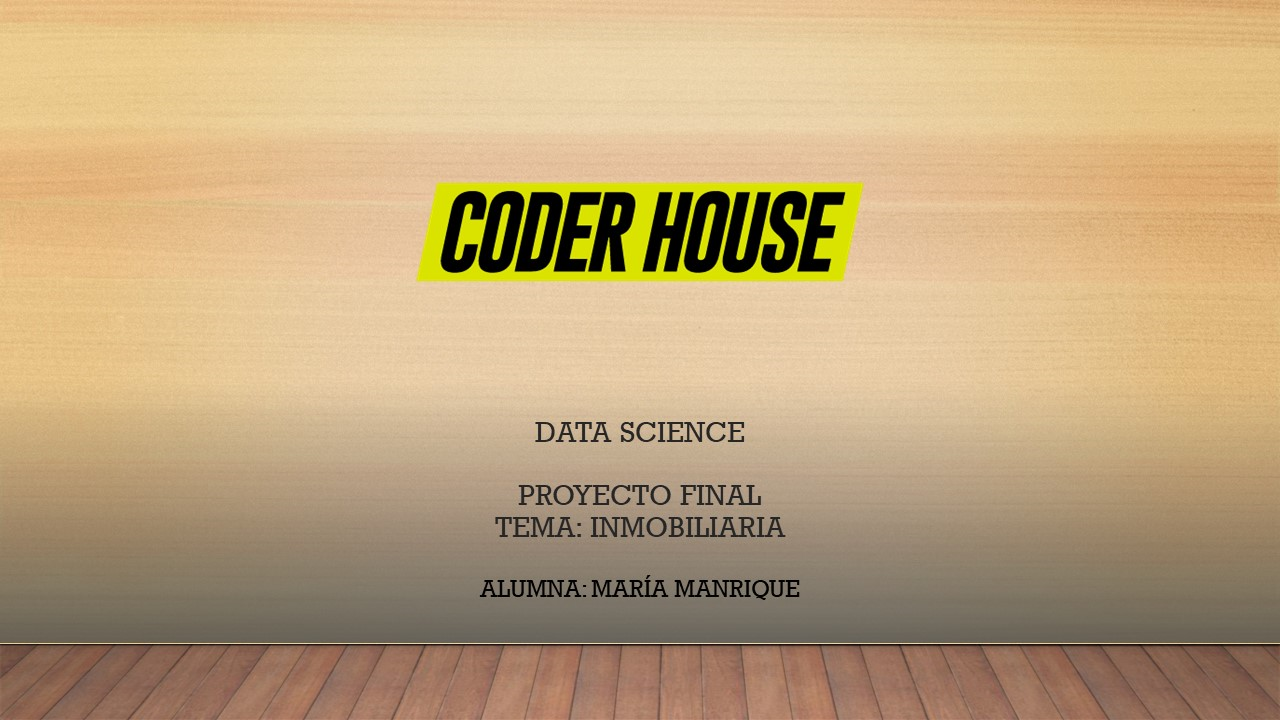

In [ ]:
# @title
from IPython.display import Image
Image ('/content/drive/MyDrive/data sciense 2023/portada-science.png')

<h2>Abstrac</h2>

En el siguiente proyecto de Data Science se busco predecir el precio de ventas de los inmuebles en Capital Federal.
La venta de inmuebles en dicho partido se ve afectado constantemente por el contexto socio-economico del pais, la  incertidubre del mercado inmobiliario perjudican en las negociaciones es por ello, que actualizar y predecir  más cerca el valor real del inmueble que dicta el mercado, más interés tendrán los compradores en la casa, y por tanto, más cerca se concretará la venta. Por tanto, poner un precio adecuado desde el primer momento es clave para la venta.

Através del analisis del conjunto de datos obtenidos de la plataforma web Properati (properati.com.ar/data/)de distintas propiedades ofrecidas a la venta en Capital Federal se busco concretar el objetivo de desarrollar un modelo avanzado y optimizado, para predecir precios de inmuebles. Se utilizó herramientas y técnicas de análisis de datos y un modelado predictivo. Para responder preguntas específicas, como:

¿El precio de venta del inmueble tiene alguna relacion con la superficie?
¿Que zonas tienen los precios mas elevados?
¿Cuáles son las zonas con mayor ventas y menor precio?
¿Los inmuebles con mayor habitaciones tienen precio de venta más elevado?
¿Qué tan precisos son los modelos de predicción para identificar los precios de venta?

Cuyas respuestas fueron respondidas con un análisis exploratorio de datos, se creó un modelo predictivo utilizando técnicas de aprendizaje automático y se evaluó su precisión.

### Contexto Analitico


Importacion de librerias

In [36]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import geopandas as gpd
import json


In [38]:
import plotly.express as px
import shapely.wkt


LINK DE PRESENTACION

*  https://docs.google.com/presentation/d/1XGZv884Adw5DoLufc7v62qKh6Sr19n8GWyBzazh0BKo/edit?usp=sharing

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
!gdown bsas_realstate_on_sale_properati_dataset_2020.csv

Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=bsas_realstate_on_sale_properati_dataset_2020.csv

but Gdown can't. Please check connections and permissions.


Importacion de Dataset

In [39]:
import pandas
url ='/content/drive/MyDrive/data sciense 2023/bsas_realstate_on_sale_properati_dataset_2020.csv'
df = pandas.read_csv(url, index_col=0)
df

,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
start_date,,,,,,,,,,,,,,,,,,
2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta


**Visualizaciones de los datos**

se explora el formato y la cantidad de datos no nulos en el dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146660 entries, 2019-10-17 to 2019-07-31
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   end_date         146660 non-null  object 
 1   created_on       146660 non-null  object 
 2   lat              136735 non-null  float64
 3   lon              136701 non-null  float64
 4   l1               146660 non-null  object 
 5   l2               146660 non-null  object 
 6   l3               146660 non-null  object 
 7   rooms            146660 non-null  float64
 8   bedrooms         146660 non-null  float64
 9   bathrooms        140703 non-null  float64
 10  surface_total    126133 non-null  float64
 11  surface_covered  125046 non-null  float64
 12  price            146660 non-null  float64
 13  currency         146660 non-null  object 
 14  title            146660 non-null  object 
 15  description      146660 non-null  object 
 16  property_type    146660 non-nu

Se renombra columnas

In [ ]:
df.rename(columns={"l1":"Pais", "l2":"Partido", "l3":"Barrio","rooms":"Habitacion","surface_total":"Superficie_total","surface_covered":"Superficie_Cubierta", "price":"Precio","bedrooms":"dormitorio","bathrooms":"banos"}, inplace=True)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 146660 entries, 2019-10-17 to 2019-07-31
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   end_date             146660 non-null  object 
 1   created_on           146660 non-null  object 
 2   lat                  136735 non-null  float64
 3   lon                  136701 non-null  float64
 4   Pais                 146660 non-null  object 
 5   Partido              146660 non-null  object 
 6   Barrio               146660 non-null  object 
 7   Habitacion           146660 non-null  float64
 8   dormitorio           146660 non-null  float64
 9   banos                140703 non-null  float64
 10  Superficie_total     126133 non-null  float64
 11  Superficie_Cubierta  125046 non-null  float64
 12  Precio               146660 non-null  float64
 13  currency             146660 non-null  object 
 14  title                146660 non-null  object 
 15  descripti

In [ ]:
df.shape

(146660, 18)

se contabilizan los datos unicos por columnas

In [ ]:
df.nunique()

,0
end_date,412
created_on,366
lat,59636
lon,60075
Pais,1
Partido,4
Barrio,89
Habitacion,25
dormitorio,16
banos,14


**Limpieza de datos**

Consiste en la manipulación, limpieza y unificación de conjuntos de datos complejos
y desordenados para facilitar su acceso, análisis y modelado. El proceso incluye
convertir y mapear los datos crudos, y dejarlos en un formato más adecuado para su
uso.


1-Informacion y caracteristicas de los datos

In [ ]:
df_1=df

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146660 entries, 2019-10-17 to 2019-07-31
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   end_date             146660 non-null  object 
 1   created_on           146660 non-null  object 
 2   lat                  136735 non-null  float64
 3   lon                  136701 non-null  float64
 4   Pais                 146660 non-null  object 
 5   Partido              146660 non-null  object 
 6   Barrio               146660 non-null  object 
 7   Habitacion           146660 non-null  float64
 8   dormitorio           146660 non-null  float64
 9   banos                140703 non-null  float64
 10  Superficie_total     126133 non-null  float64
 11  Superficie_Cubierta  125046 non-null  float64
 12  Precio               146660 non-null  float64
 13  currency             146660 non-null  object 
 14  title                146660 non-null  object 
 15  descripti

Se filtra los datos que pertenecen a Capital Federal

In [ ]:
df_2=df_1[(df_1.Partido=='Capital Federal')]

Se observa en el conteo de datos que algunas columnas tienen datos faltantes,
realizamos el análisis de esos missing values y se visualizan.

In [ ]:
df_2.isnull().sum()

,0
end_date,0
created_on,0
lat,4594
lon,4608
Pais,0
Partido,0
Barrio,0
Habitacion,0
dormitorio,0
banos,2522


Outliers

se realiza un análisis y manejo de outliers. Atraves de algunos gráficos se los identifica para tratarlos.


<Axes: >

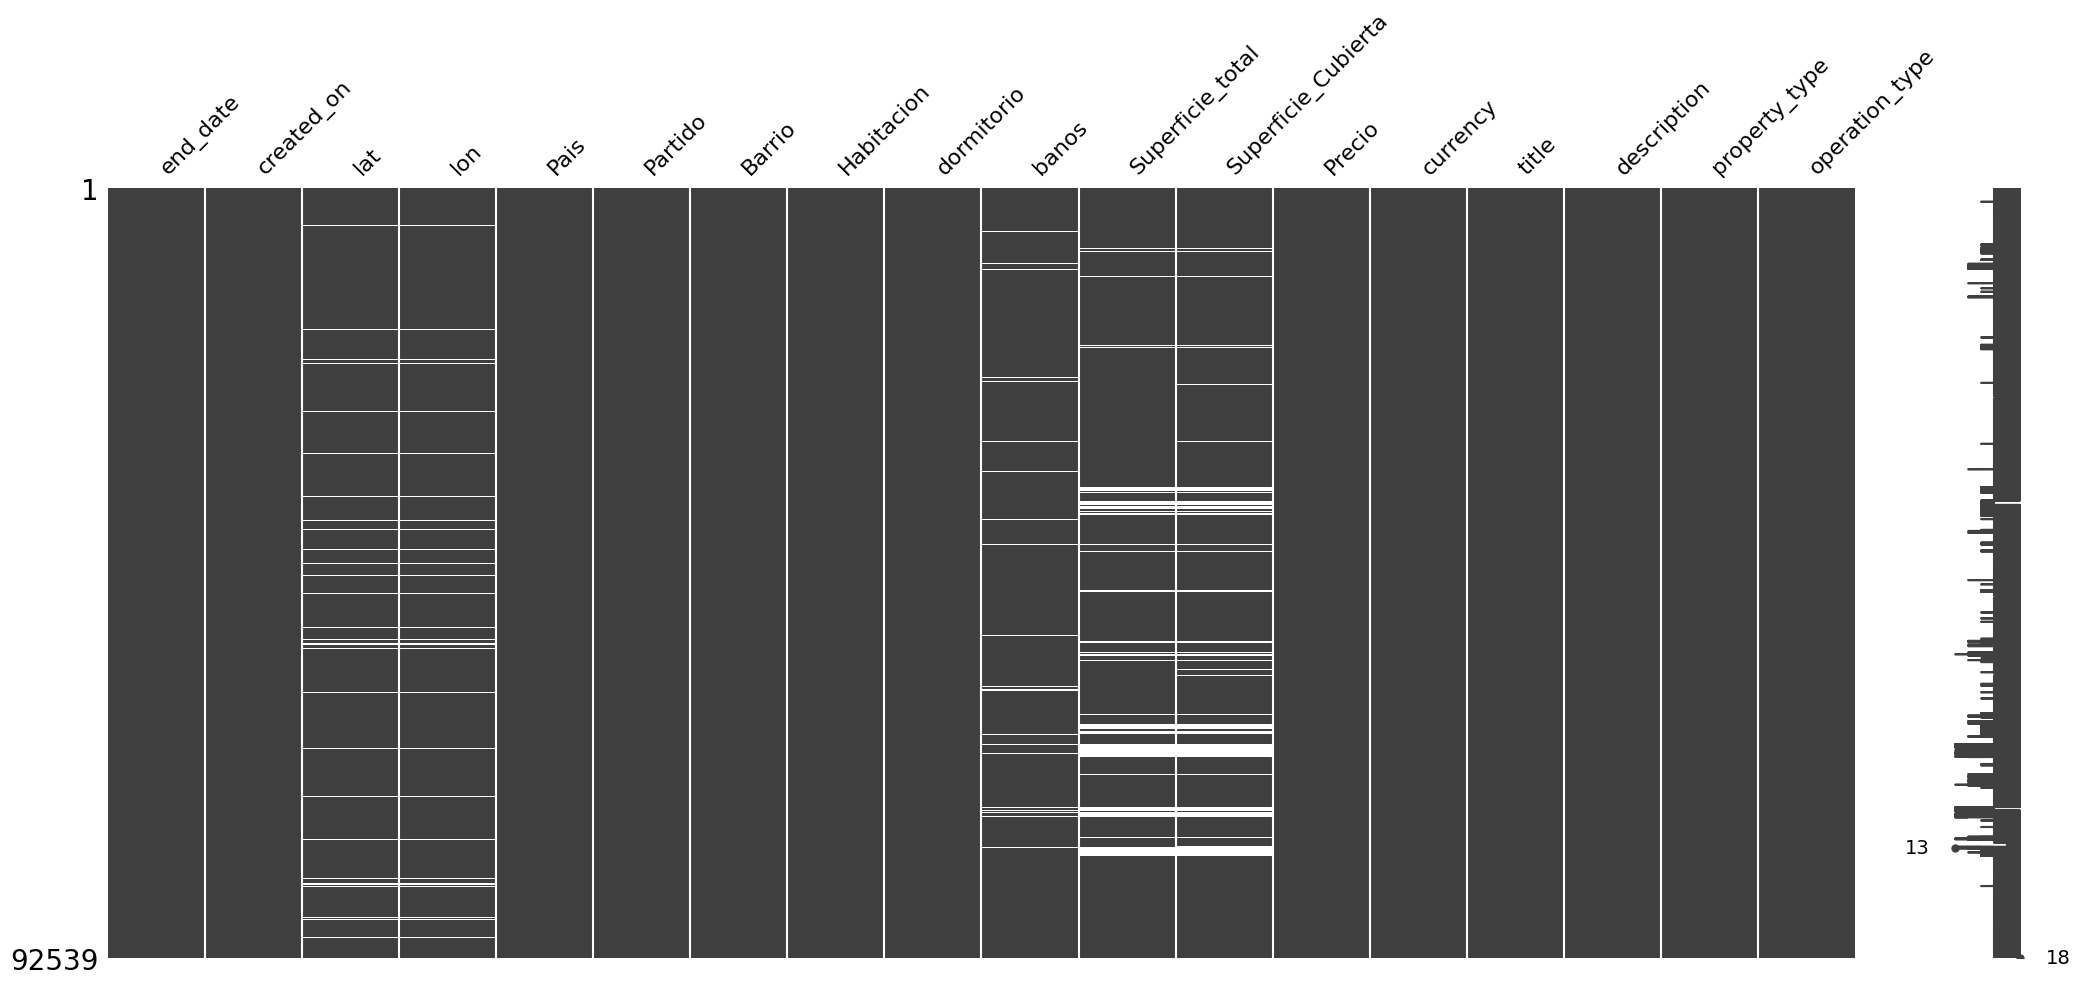

In [ ]:
msno.matrix(df_2)

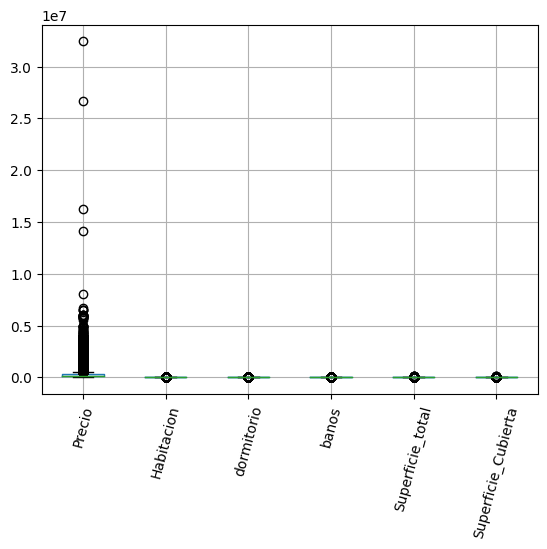

In [ ]:
ax=df_2[['Precio','Habitacion',	'dormitorio','banos','Superficie_total','Superficie_Cubierta']].boxplot()
ax.tick_params(axis='x', rotation=75)

Se crea la variable precio el cual contiene los valores de la columna Precio con los outliers eliminados.

In [ ]:
precio = df_2.query('Precio < 300000 & Precio > 0')
precio.head(3)

,end_date,created_on,lat,lon,Pais,Partido,Barrio,Habitacion,dormitorio,banos,Superficie_total,Superficie_Cubierta,Precio,currency,title,description,property_type,operation_type
start_date,,,,,,,,,,,,,,,,,,
2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta


In [ ]:
datos=precio[['Pais','Partido','Barrio','lat','lon','Precio','Habitacion',	'dormitorio','banos','Superficie_total','Superficie_Cubierta']]
datos.head(5)

,Pais,Partido,Barrio,lat,lon,Precio,Habitacion,dormitorio,banos,Superficie_total,Superficie_Cubierta
start_date,,,,,,,,,,,
2019-10-17,Argentina,Capital Federal,San Cristobal,-34.605880,-58.384949,153000.0,7.0,7.0,2.0,140.0,140.0
2019-10-17,Argentina,Capital Federal,Boedo,-34.624056,-58.412110,159000.0,2.0,1.0,2.0,70.0,58.0
2019-10-17,Argentina,Capital Federal,Palermo,-34.593569,-58.427474,125000.0,2.0,1.0,1.0,45.0,45.0
2019-10-17,Argentina,Capital Federal,Palermo,-34.581294,-58.436754,295000.0,2.0,1.0,1.0,85.0,50.0
2019-10-17,Argentina,Capital Federal,Villa Crespo,-34.593779,-58.441239,150000.0,2.0,1.0,1.0,56.0,56.0


Se observa outliers en las columnas superficie_completa y superficie_total, se los reduce.

In [ ]:
datos2 = datos.query('Superficie_Cubierta < 120 & Superficie_Cubierta> 0')
datos2.head(5)

,Pais,Partido,Barrio,lat,lon,Precio,Habitacion,dormitorio,banos,Superficie_total,Superficie_Cubierta
start_date,,,,,,,,,,,
2019-10-17,Argentina,Capital Federal,Boedo,-34.624056,-58.412110,159000.0,2.0,1.0,2.0,70.0,58.0
2019-10-17,Argentina,Capital Federal,Palermo,-34.593569,-58.427474,125000.0,2.0,1.0,1.0,45.0,45.0
2019-10-17,Argentina,Capital Federal,Palermo,-34.581294,-58.436754,295000.0,2.0,1.0,1.0,85.0,50.0
2019-10-17,Argentina,Capital Federal,Villa Crespo,-34.593779,-58.441239,150000.0,2.0,1.0,1.0,56.0,56.0
2019-10-17,Argentina,Capital Federal,Villa Crespo,-34.600988,-58.433061,159500.0,2.0,1.0,1.0,70.0,70.0


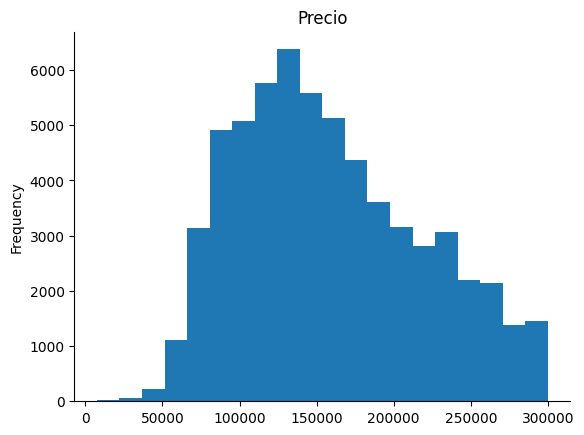

In [ ]:
# @title Precio

from matplotlib import pyplot as plt
datos2['Precio'].plot(kind='hist', bins=20, title='Precio')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
datos3 = datos2.query('Superficie_total < 130 & Superficie_total> 0')
datos3.head(5)

,Pais,Partido,Barrio,lat,lon,Precio,Habitacion,dormitorio,banos,Superficie_total,Superficie_Cubierta
start_date,,,,,,,,,,,
2019-10-17,Argentina,Capital Federal,Boedo,-34.624056,-58.412110,159000.0,2.0,1.0,2.0,70.0,58.0
2019-10-17,Argentina,Capital Federal,Palermo,-34.593569,-58.427474,125000.0,2.0,1.0,1.0,45.0,45.0
2019-10-17,Argentina,Capital Federal,Palermo,-34.581294,-58.436754,295000.0,2.0,1.0,1.0,85.0,50.0
2019-10-17,Argentina,Capital Federal,Villa Crespo,-34.593779,-58.441239,150000.0,2.0,1.0,1.0,56.0,56.0
2019-10-17,Argentina,Capital Federal,Villa Crespo,-34.600988,-58.433061,159500.0,2.0,1.0,1.0,70.0,70.0


Se grafica nuevamente para observar como quedan las variables tras el trabajo con los outliers.

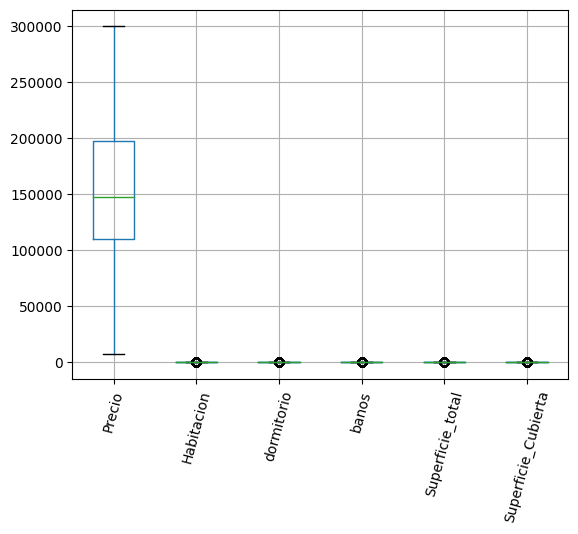

In [ ]:
ax1=datos3[['Precio','Habitacion',	'dormitorio','banos','Superficie_total','Superficie_Cubierta']].boxplot()
ax1.tick_params(axis='x', rotation=75)

Contabilizamos nuevamentos los datos nulos y los reeemplazamos por la media

In [ ]:
datos3.isnull().sum()

Pais                      0
Partido                   0
Barrio                    0
lat                    2566
lon                    2566
Precio                    0
Habitacion                0
dormitorio                0
banos                   684
Superficie_total          0
Superficie_Cubierta       0
dtype: int64

In [ ]:
datos4=datos3[['Precio','Habitacion',	'dormitorio','banos','Superficie_total','Superficie_Cubierta','lat','lon']]

In [ ]:
datos4.mean()

Precio                 156771.942806
Habitacion                  2.532761
dormitorio                  1.625739
banos                       1.231518
Superficie_total           62.027153
Superficie_Cubierta        55.741369
lat                       -34.599639
lon                       -58.437159
dtype: float64

In [ ]:
datos_limpios=datos4.fillna(datos4.mean())

In [ ]:
datos_limpios.isnull().sum()

Precio                 0
Habitacion             0
dormitorio             0
banos                  0
Superficie_total       0
Superficie_Cubierta    0
lat                    0
lon                    0
dtype: int64

In [ ]:
datos_limpios.shape

(59552, 8)

**Graficos**

Se pueden identicar los precios distribuidos según la cantidad de habitaciones del inmuebles. Esto responde a la pregunta: ¿Los inmuebles con mayor habitaciones tienen precio de venta más alto?

<Figure size 1000x800 with 0 Axes>

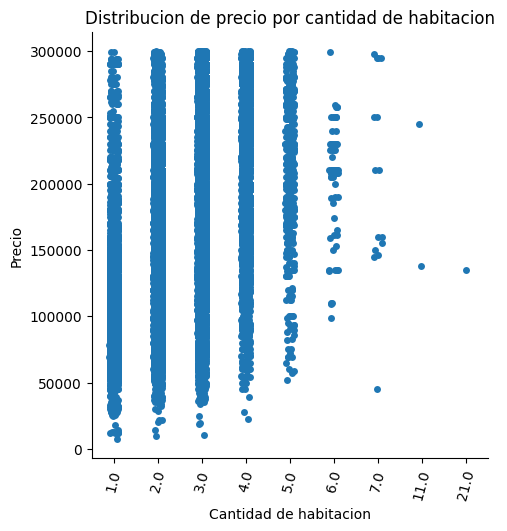

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.catplot(x="Habitacion", y="Precio", data=datos_limpios)
ax.tick_params(axis='x', rotation=75)
plt.title('Distribucion de precio por cantidad de habitacion')
plt.ylabel('Precio')
plt.xlabel('Cantidad de habitacion')
plt.show()

**Exploracion de los datos**

Una vez que la base de datos esta limpia y curada, se realiza un segundo análisis de los datos, con foco en nuestra variable target (price) dado que nuestro objetivo sera predecir el precio de venta.

En base al objetivo se visualiza la correlacion de la variable target.

In [ ]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59552 entries, 2019-10-17 to 2019-07-31
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Precio               59552 non-null  float64
 1   Habitacion           59552 non-null  float64
 2   dormitorio           59552 non-null  float64
 3   banos                59552 non-null  float64
 4   Superficie_total     59552 non-null  float64
 5   Superficie_Cubierta  59552 non-null  float64
 6   lat                  59552 non-null  float64
 7   lon                  59552 non-null  float64
dtypes: float64(8)
memory usage: 6.1+ MB


In [ ]:
datos_i=datos_limpios[['Precio','Habitacion',	'dormitorio','banos','Superficie_total','Superficie_Cubierta']]

<Axes: >

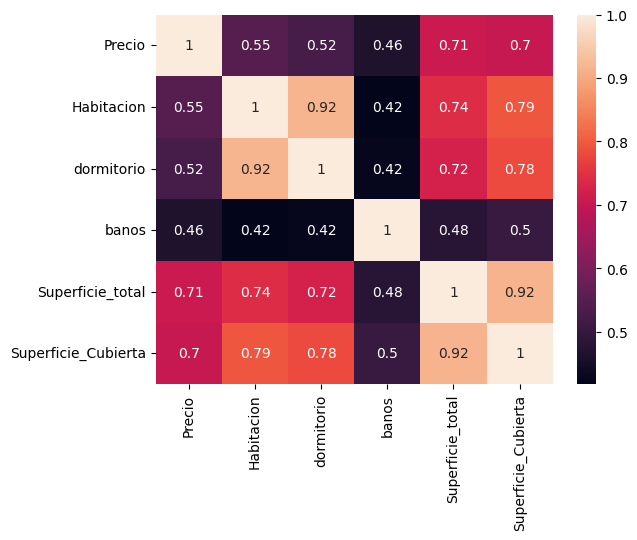

In [ ]:
sns.heatmap(datos_i.corr(numeric_only=True), annot=True)

In [ ]:
datos_i.corr()

,Precio,Habitacion,dormitorio,banos,Superficie_total,Superficie_Cubierta
Precio,1.000000,0.547147,0.524233,0.464218,0.707200,0.702345
Habitacion,0.547147,1.000000,0.916277,0.417066,0.740990,0.793052
dormitorio,0.524233,0.916277,1.000000,0.424171,0.722808,0.780822
banos,0.464218,0.417066,0.424171,1.000000,0.479203,0.504198
Superficie_total,0.707200,0.740990,0.722808,0.479203,1.000000,0.915276
Superficie_Cubierta,0.702345,0.793052,0.780822,0.504198,0.915276,1.000000


Se agrega columna con el precio en millones

In [ ]:
datos_i['Precio_Millon'] = datos_i.Precio/1000000

<ipython-input-313-52bc14c8fb88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_i['Precio_Millon'] = datos_i.Precio/1000000


Para visualizar el precio de venta por metro cuadrado de superficie se agrego una nueva columna Valor_m2_Millon.

In [ ]:
datos_i['Valor_m2_Millon'] = datos_i['Precio_Millon']/datos_i['Superficie_total']

Mapa de Coropleta permite visualizar a traves de un mapa las zonas de capital federal con sus respectivos precios



In [ ]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59552 entries, 2019-10-17 to 2019-07-31
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Precio               59552 non-null  float64
 1   Habitacion           59552 non-null  float64
 2   dormitorio           59552 non-null  float64
 3   banos                59552 non-null  float64
 4   Superficie_total     59552 non-null  float64
 5   Superficie_Cubierta  59552 non-null  float64
 6   lat                  59552 non-null  float64
 7   lon                  59552 non-null  float64
dtypes: float64(8)
memory usage: 6.1+ MB


In [ ]:
zona=datos_limpios

In [ ]:
gpd.points_from_xy(zona.lat,zona.lon)

<GeometryArray>
[<POINT (-34.624 -58.412)>, <POINT (-34.594 -58.427)>,
 <POINT (-34.581 -58.437)>, <POINT (-34.594 -58.441)>,
 <POINT (-34.601 -58.433)>, <POINT (-34.601 -58.433)>,
   <POINT (-34.64 -58.42)>,   <POINT (-34.64 -58.42)>,
 <POINT (-34.586 -58.496)>, <POINT (-34.604 -58.382)>,
 ...
 <POINT (-34.581 -58.441)>,  <POINT (-34.58 -58.435)>,
  <POINT (-34.58 -58.435)>, <POINT (-34.575 -58.431)>,
 <POINT (-34.581 -58.441)>, <POINT (-34.582 -58.434)>,
 <POINT (-34.579 -58.436)>, <POINT (-34.582 -58.434)>,
 <POINT (-34.577 -58.434)>,   <POINT (-34.6 -58.437)>]
Length: 59552, dtype: geometry

In [ ]:
geodf = gpd.GeoDataFrame(zona,geometry=gpd.points_from_xy(zona.lat, zona.lon))

In [ ]:
geodf.head()

,Precio,Habitacion,dormitorio,banos,Superficie_total,Superficie_Cubierta,lat,lon,geometry
start_date,,,,,,,,,
2019-10-17,159000.0,2.0,1.0,2.0,70.0,58.0,-34.624056,-58.412110,POINT (-34.62406 -58.41211)
2019-10-17,125000.0,2.0,1.0,1.0,45.0,45.0,-34.593569,-58.427474,POINT (-34.59357 -58.42747)
2019-10-17,295000.0,2.0,1.0,1.0,85.0,50.0,-34.581294,-58.436754,POINT (-34.58129 -58.43675)
2019-10-17,150000.0,2.0,1.0,1.0,56.0,56.0,-34.593779,-58.441239,POINT (-34.59378 -58.44124)
2019-10-17,159500.0,2.0,1.0,1.0,70.0,70.0,-34.600988,-58.433061,POINT (-34.60099 -58.43306)


In [ ]:
geodf.geometry

start_date
2019-10-17    POINT (-34.62406 -58.41211)
2019-10-17    POINT (-34.59357 -58.42747)
2019-10-17    POINT (-34.58129 -58.43675)
2019-10-17    POINT (-34.59378 -58.44124)
2019-10-17    POINT (-34.60099 -58.43306)
                         ...             
2019-07-31    POINT (-34.58170 -58.43355)
2019-07-31    POINT (-34.57869 -58.43553)
2019-07-31    POINT (-34.58170 -58.43355)
2019-07-31    POINT (-34.57657 -58.43439)
2019-07-31    POINT (-34.59964 -58.43716)
Name: geometry, Length: 59552, dtype: geometry

<Axes: >

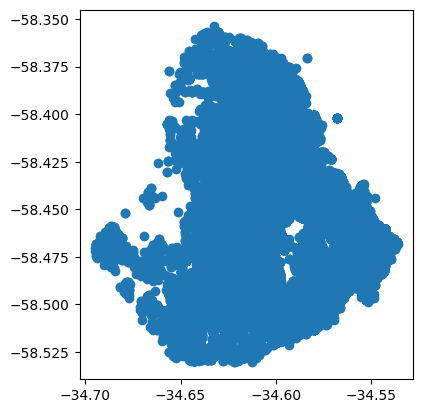

In [ ]:
geodf.plot()

se evidencia la relacion entre superficie total y el precio de venta.

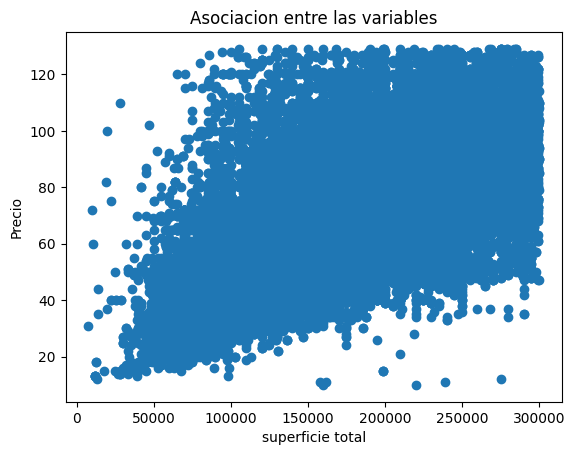

In [ ]:

plt.scatter(datos_i.Precio,datos_i.Superficie_total)

plt.title('Asociacion entre las variables')
plt.ylabel('Precio')
plt.xlabel('superficie total')
plt.show()

se evidencia la relacion entre superficie cubierta y el precio de venta.

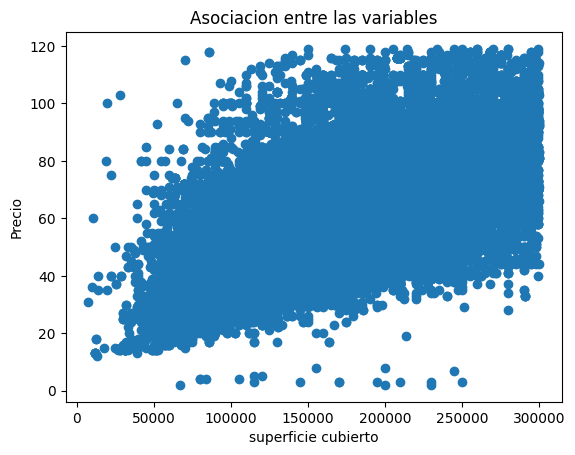

In [ ]:
plt.scatter(datos_i.Precio,datos_i.Superficie_Cubierta)

plt.title('Asociacion entre las variables')
plt.ylabel('Precio')
plt.xlabel('superficie cubierto')
plt.show()

Tras los distintos tipos de análisis aplicados (Univariado, Bivariado y Multivariado)
aprendidos durante el curso, se llego a la siguiente conclusion sobre el precio de venta de los inmuebles en Capital Federal:

● La zona con mayor ventas se concentran en capital federal

● Las variables superficie_total, superficie cubierta tienen correlacion positiva por tanto afecta al precio de venta, lo que significa que cuando aumenta la superficie aumenta el precio de venta.
Por el contrario las variables  Habitacion,	dormitorio y banos tienen una baja correlación con el precio por lo tanto no son tan significativas.